<a href="https://colab.research.google.com/github/aarondelgiudice/thinkful_data_bootcamp/blob/master/unit_4/capstone/4_5a_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# My Fellow Citizens:
#### Natural Language Processing Model of Inaugural Addresses

### Table of Contents
1. Preprocessing
    - Import Data and Packages
    - EDA
    - Feature Engineering
    - Clean Data
    - Parse Data
2. Feature Extraction
    - Bag of Words
    - Tf-idf
3. Model Selection
    - Split Test/Training Data
    - Clustering
        - K-Means
        - Mean Shift
        - Spectral Clustering
        - Affinity Propagation
    - Supervised Learning
        - L1/l2 Regression
        - Random Forest
        - Support Vector Machine
    - Assessment
4. Model Tuning
    - Dimensionality Reduction
    - Supervised/Unsupervised Model Comparrison
5. Conclusion

## Preprocessing

### Import Data

In [0]:
# load packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

In [0]:
#filename = 'inaugural'
#df_prez = pd.read_csv(filename+".csv", index_col=0)
#df_prez.head()

In [3]:
# load data
import nltk
from nltk.corpus import inaugural, stopwords
nltk.download('inaugural')

inaugural.fileids()

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.


['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

### EDA

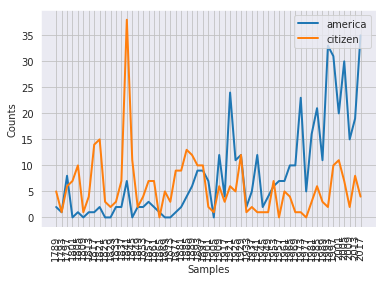

In [4]:
cfd = nltk.ConditionalFreqDist((target, fileid[:4])
                               for fileid in inaugural.fileids()
                               for w in inaugural.words(fileid)
                               for target in ['america', 'citizen']
                               if w.lower().startswith(target)
                              )
cfd.plot()

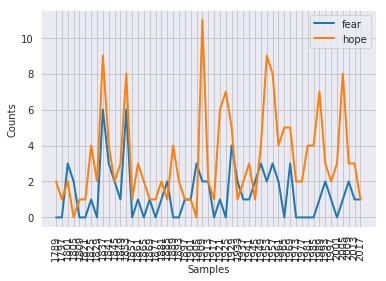

In [5]:
cfd = nltk.ConditionalFreqDist((target, fileid[:4])
                               for fileid in inaugural.fileids()
                               for w in inaugural.words(fileid)
                               for target in ['fear', 'hope']
                               if w.lower().startswith(target)
                              )
cfd.plot()

### Feature Engineering

In [6]:
df_prez = pd.DataFrame(columns=["fileid", "target", "era",
                                "year", "president", "party",
                                "recession", "wartime", "text_raw"])

fileids = []
texts = []

for i in inaugural.fileids():
  fileids.append(i)
  texts.append(inaugural.raw(i))

df_prez['fileid'] = fileids 
df_prez['text_raw'] = texts
display(df_prez.shape)
df_prez.head()

(58, 9)

,fileid,target,era,year,president,party,recession,wartime,text_raw
0,1789-Washington.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fellow-Citizens of the Senate and of the House...
1,1793-Washington.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Fellow citizens, I am again called upon by the..."
2,1797-Adams.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"When it was first perceived, in early times, t..."
3,1801-Jefferson.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friends and Fellow Citizens:\n\nCalled upon to...
4,1805-Jefferson.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Proceeding, fellow citizens, to that qualifica..."


In [0]:
# Inaugural addresses from 2013-2017 not included
# Upload locally (sourced from whitehouse.gov)
with open('2013-obama.txt', 'rb') as myfile:
  obama_2013 = myfile.read()
obama_2013 = str(obama_2013)

with open('2017-trump.txt', 'rb') as myfile:
  trump_2017 = myfile.read()
trump_2017 = str(trump_2017)

In [8]:
df_temp = pd.DataFrame([['2013-obama', obama_2013], ['2017-trump', trump_2017]], columns=['fileid', 'text_raw'])
df_prez.append(df_temp, ignore_index=True, sort=False)
df_prez.tail()

,fileid,target,era,year,president,party,recession,wartime,text_raw
53,2001-Bush.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"President Clinton, distinguished guests and my..."
54,2005-Bush.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Vice President Cheney, Mr. Chief Justice, Pres..."
55,2009-Obama.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,My fellow citizens:\n\nI stand here today humb...
56,2013-Obama.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thank you. Thank you so much.\n\nVice Presiden...
57,2017-Trump.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Chief Justice Roberts, President Carter, Presi..."


In [9]:
df_prez['year'] = [x.split('-')[0] for x in df_prez['fileid']]
df_prez['year'] = pd.to_datetime(df_prez['year']).dt.year
df_prez['president'] = [x.split('-')[1].split('.')[0].lower() for x in df_prez['fileid']]
df_prez.head()

,fileid,target,era,year,president,party,recession,wartime,text_raw
0,1789-Washington.txt,NaN,NaN,1789,washington,NaN,NaN,NaN,Fellow-Citizens of the Senate and of the House...
1,1793-Washington.txt,NaN,NaN,1793,washington,NaN,NaN,NaN,"Fellow citizens, I am again called upon by the..."
2,1797-Adams.txt,NaN,NaN,1797,adams,NaN,NaN,NaN,"When it was first perceived, in early times, t..."
3,1801-Jefferson.txt,NaN,NaN,1801,jefferson,NaN,NaN,NaN,Friends and Fellow Citizens:\n\nCalled upon to...
4,1805-Jefferson.txt,NaN,NaN,1805,jefferson,NaN,NaN,NaN,"Proceeding, fellow citizens, to that qualifica..."


In [10]:
len(df_prez['president'].unique())
df_prez['president'].unique()

array(['washington', 'adams', 'jefferson', 'madison', 'monroe', 'jackson',
       'vanburen', 'harrison', 'polk', 'taylor', 'pierce', 'buchanan',
       'lincoln', 'grant', 'hayes', 'garfield', 'cleveland', 'mckinley',
       'roosevelt', 'taft', 'wilson', 'harding', 'coolidge', 'hoover',
       'truman', 'eisenhower', 'kennedy', 'johnson', 'nixon', 'carter',
       'reagan', 'bush', 'clinton', 'obama', 'trump'], dtype=object)

In [11]:
df_prez['era'].loc[df_prez['year']<1818] = 'founding'
df_prez.loc[df_prez['year']<1818].head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,fileid,target,era,year,president,party,recession,wartime,text_raw
0,1789-Washington.txt,NaN,founding,1789,washington,NaN,NaN,NaN,Fellow-Citizens of the Senate and of the House...
1,1793-Washington.txt,NaN,founding,1793,washington,NaN,NaN,NaN,"Fellow citizens, I am again called upon by the..."
2,1797-Adams.txt,NaN,founding,1797,adams,NaN,NaN,NaN,"When it was first perceived, in early times, t..."
3,1801-Jefferson.txt,NaN,founding,1801,jefferson,NaN,NaN,NaN,Friends and Fellow Citizens:\n\nCalled upon to...
4,1805-Jefferson.txt,NaN,founding,1805,jefferson,NaN,NaN,NaN,"Proceeding, fellow citizens, to that qualifica..."


In [12]:
for year in range(1818, 1850):
  df_prez['era'].loc[df_prez['year'] == year] = 'expansion'

for year in range(1850, 1866):
  df_prez['era'].loc[df_prez['year'] == year] = 'civil war'

for year in range(1866, 1877):
  df_prez['era'].loc[df_prez['year'] == year] = 'reconstruction'

for year in range(1877, 1917):
  df_prez['era'].loc[df_prez['year'] == year] = 'progressive'

for year in range(1917, 1920):
  df_prez['era'].loc[df_prez['year'] == year] = 'first world war'

for year in range(1920, 1930):
  df_prez['era'].loc[df_prez['year'] == year] = 'roaring twenties'

for year in range(1930, 1941):
  df_prez['era'].loc[df_prez['year'] == year] = 'great despression'

for year in range(1941, 1946):
  df_prez['era'].loc[df_prez['year'] == year] = 'world war two'

for year in range(1946, 1965):
  df_prez['era'].loc[df_prez['year'] == year] = 'post-war'

for year in range(1965, 1981):
  df_prez['era'].loc[df_prez['year'] == year] = 'civil rights era'

for year in range(1981, 2009):
  df_prez['era'].loc[df_prez['year'] == year] = 'reagan era'

df_prez['era'].loc[df_prez['year']>2008] = 'modern'

df_prez['era'].unique()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


array(['founding', 'expansion', 'civil war', 'reconstruction',
       'progressive', 'first world war', 'roaring twenties',
       'great despression', 'world war two', 'post-war',
       'civil rights era', 'reagan era', 'modern'], dtype=object)

In [13]:
target_value = 0
for era in df_prez['era'].unique():
  df_prez['target'].loc[df_prez['era']==era] = target_value
  target_value += 1
  
df_prez['target'].unique()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [14]:
df_prez['recession'] = 0

for year in range(1802, 1805):
  df_prez['recession'].loc[df_prez['year'] == year] = 1
  
for year in range(1807, 1808):
  df_prez['recession'].loc[df_prez['year'] == year] = 1
  
for year in range(1812, 1813):
  df_prez['recession'].loc[df_prez['year'] == year] = 1
  
for year in range(1815, 1822):
  df_prez['recession'].loc[df_prez['year'] == year] = 1
  
for year in range(1822, 1824):
  df_prez['recession'].loc[df_prez['year'] == year] = 1
  
for year in range(1825, 1827):
  df_prez['recession'].loc[df_prez['year'] == year] = 1
  
for year in range(1828, 1830):
  df_prez['recession'].loc[df_prez['year'] == year] = 1
  
for year in range(1833, 1835):
  df_prez['recession'].loc[df_prez['year'] == year] = 1
  
for year in range(1836, 1839):
  df_prez['recession'].loc[df_prez['year'] == year] = 1
  
for year in range(1839, 1844):
  df_prez['recession'].loc[df_prez['year'] == year] = 1
  
for year in range(1845, 1846):
  df_prez['recession'].loc[df_prez['year'] == year] = 1
  
for year in range(1847, 1849):
  df_prez['recession'].loc[df_prez['year'] == year] = 1
  
for year in range(1853, 1855):
  df_prez['recession'].loc[df_prez['year'] == year] = 1
  
for year in range(1857, 1859):
  df_prez['recession'].loc[df_prez['year'] == year] = 1
  
for year in range(1860, 1862):
  df_prez['recession'].loc[df_prez['year'] == year] = 1
  
for year in range(1865, 1868):
  df_prez['recession'].loc[df_prez['year'] == year] = 1
  
for year in range(1869, 1871):
  df_prez['recession'].loc[df_prez['year'] == year] = 1
  
for year in range(1873, 1880):
  df_prez['recession'].loc[df_prez['year'] == year] = 1
  
for year in range(1882, 1886):
  df_prez['recession'].loc[df_prez['year'] == year] = 1
  
for year in range(1887, 1889):
  df_prez['recession'].loc[df_prez['year'] == year] = 1
  
for year in range(1890, 1892):
  df_prez['recession'].loc[df_prez['year'] == year] = 1
  
for year in range(1883, 1895):
  df_prez['recession'].loc[df_prez['year'] == year] = 1
  
for year in range(1895, 1898):
  df_prez['recession'].loc[df_prez['year'] == year] = 1
  
for year in range(1899, 1901):
  df_prez['recession'].loc[df_prez['year'] == year] = 1
  
for year in range(1902, 1905):
  df_prez['recession'].loc[df_prez['year'] == year] = 1
  
for year in range(1907, 1909):
  df_prez['recession'].loc[df_prez['year'] == year] = 1
  
for year in range(1910, 1912):
  df_prez['recession'].loc[df_prez['year'] == year] = 1
  
for year in range(1913, 1915):
  df_prez['recession'].loc[df_prez['year'] == year] = 1
  
for year in range(1918, 1920):
  df_prez['recession'].loc[df_prez['year'] == year] = 1
  
for year in range(1920, 1922):
  df_prez['recession'].loc[df_prez['year'] == year] = 1
  
for year in range(1923, 1925):
  df_prez['recession'].loc[df_prez['year'] == year] = 1
  
for year in range(1926, 1928):
  df_prez['recession'].loc[df_prez['year'] == year] = 1
  
for year in range(1929, 1933):
  df_prez['recession'].loc[df_prez['year'] == year] = 1
  
for year in range(1937, 1939):
  df_prez['recession'].loc[df_prez['year'] == year] = 1

for year in range(1945, 1946):
  df_prez['recession'].loc[df_prez['year'] == year] = 1
  
for year in range(1948, 1950):
  df_prez['recession'].loc[df_prez['year'] == year] = 1
  
for year in range(1953, 1955):
  df_prez['recession'].loc[df_prez['year'] == year] = 1
  
for year in range(1957, 1959):
  df_prez['recession'].loc[df_prez['year'] == year] = 1
  
for year in range(1960, 1962):
  df_prez['recession'].loc[df_prez['year'] == year] = 1
  
for year in range(1969, 1971):
  df_prez['recession'].loc[df_prez['year'] == year] = 1
  
for year in range(1973, 1976):
  df_prez['recession'].loc[df_prez['year'] == year] = 1
  
for year in range(1980, 1983):
  df_prez['recession'].loc[df_prez['year'] == year] = 1
  
for year in range(1990, 1992):
  df_prez['recession'].loc[df_prez['year'] == year] = 1
  
for year in range(2001, 2002):
  df_prez['recession'].loc[df_prez['year'] == year] = 1
  
for year in range(2007, 2010):
  df_prez['recession'].loc[df_prez['year'] == year] = 1
  
print("{} total recessions, or {}% of speaches ".format(
    df_prez['recession'].sum(), df_prez['recession'].sum()/len(df_prez)))
df_prez.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


33 total recessions, or 0.5689655172413793% of speaches 


,fileid,target,era,year,president,party,recession,wartime,text_raw
0,1789-Washington.txt,0,founding,1789,washington,NaN,0,NaN,Fellow-Citizens of the Senate and of the House...
1,1793-Washington.txt,0,founding,1793,washington,NaN,0,NaN,"Fellow citizens, I am again called upon by the..."
2,1797-Adams.txt,0,founding,1797,adams,NaN,0,NaN,"When it was first perceived, in early times, t..."
3,1801-Jefferson.txt,0,founding,1801,jefferson,NaN,0,NaN,Friends and Fellow Citizens:\n\nCalled upon to...
4,1805-Jefferson.txt,0,founding,1805,jefferson,NaN,0,NaN,"Proceeding, fellow citizens, to that qualifica..."


In [15]:
df_prez['wartime'] = 0

for year in range(1812, 1813):
  df_prez['wartime'].loc[df_prez['year'] == year] = 1

for year in range(1846, 1849):
  df_prez['wartime'].loc[df_prez['year'] == year] = 1

for year in range(1861, 1866):
  df_prez['wartime'].loc[df_prez['year'] == year] = 1

for year in range(1917, 1919):
  df_prez['wartime'].loc[df_prez['year'] == year] = 1

for year in range(1941, 1946):
  df_prez['wartime'].loc[df_prez['year'] == year] = 1

for year in range(1950, 1954):
  df_prez['wartime'].loc[df_prez['year'] == year] = 1

for year in range(1964, 1976):
  df_prez['wartime'].loc[df_prez['year'] == year] = 1

for year in range(1990, 1992):
  df_prez['wartime'].loc[df_prez['year'] == year] = 1

for year in range(1992, 1996):
  df_prez['wartime'].loc[df_prez['year'] == year] = 1

for year in range(1998, 2000):
  df_prez['wartime'].loc[df_prez['year'] == year] = 1

df_prez['wartime'].loc[df_prez['year'] >= 2001] = 1
  
print("{} total war years, or {}% of speaches ".format(
    df_prez['wartime'].sum(), df_prez['wartime'].sum()/len(df_prez)))
df_prez.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


15 total war years, or 0.25862068965517243% of speaches 


,fileid,target,era,year,president,party,recession,wartime,text_raw
0,1789-Washington.txt,0,founding,1789,washington,NaN,0,0,Fellow-Citizens of the Senate and of the House...
1,1793-Washington.txt,0,founding,1793,washington,NaN,0,0,"Fellow citizens, I am again called upon by the..."
2,1797-Adams.txt,0,founding,1797,adams,NaN,0,0,"When it was first perceived, in early times, t..."
3,1801-Jefferson.txt,0,founding,1801,jefferson,NaN,0,0,Friends and Fellow Citizens:\n\nCalled upon to...
4,1805-Jefferson.txt,0,founding,1805,jefferson,NaN,0,0,"Proceeding, fellow citizens, to that qualifica..."


In [16]:
print(df_prez['president'].unique())

df_prez['party'] = "republican"
df_prez['party'].loc[df_prez['president']=='washington'] = 'federalist'
df_prez['party'].loc[df_prez['president']=='adams'] = 'federalist'
df_prez['party'].loc[df_prez['president']=='jefferson'] = 'democratic-republican'
df_prez['party'].loc[df_prez['president']=='madison'] = 'democratic-republican'
df_prez['party'].loc[df_prez['president']=='monroe'] = 'democratic-republican'
df_prez['party'].loc[df_prez['president']=='jackson'] = 'democrat'
df_prez['party'].loc[df_prez['president']=='vanburen'] = 'democrat'
df_prez['party'].loc[df_prez['president']=='harrison'] = 'conservative'
df_prez['party'].loc[df_prez['president']=='polk'] = 'democrat'
df_prez['party'].loc[df_prez['president']=='taylor'] = 'conservative'
df_prez['party'].loc[df_prez['president']=='pierce'] = 'democrat'
df_prez['party'].loc[df_prez['president']=='buchanan'] = 'democrat'
df_prez['party'].loc[df_prez['president']=='cleveland'] = 'democrat'
df_prez['party'].loc[df_prez['president']=='wilson'] = 'democrat'
df_prez['party'].loc[df_prez['president']=='truman'] = 'democrat'
df_prez['party'].loc[df_prez['president']=='kennedy'] = 'democrat'
df_prez['party'].loc[df_prez['president']=='johnson'] = 'democrat'
df_prez['party'].loc[df_prez['president']=='carter'] = 'democrat'
df_prez['party'].loc[df_prez['president']=='clinton'] = 'democrat'
df_prez['party'].loc[df_prez['president']=='obama'] = 'democrat'
df_prez['party'].loc[df_prez['president']=='roosevelt'] = 'democrat'
df_prez['party'].loc[df_prez['year']==1905] = 'republican'
df_prez['party'].loc[df_prez['year']==1825] = 'democratic-republican'
df_prez['party'].loc[df_prez['year']==1889] = 'republican'

df_prez.head()

['washington' 'adams' 'jefferson' 'madison' 'monroe' 'jackson' 'vanburen'
 'harrison' 'polk' 'taylor' 'pierce' 'buchanan' 'lincoln' 'grant' 'hayes'
 'garfield' 'cleveland' 'mckinley' 'roosevelt' 'taft' 'wilson' 'harding'
 'coolidge' 'hoover' 'truman' 'eisenhower' 'kennedy' 'johnson' 'nixon'
 'carter' 'reagan' 'bush' 'clinton' 'obama' 'trump']


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,fileid,target,era,year,president,party,recession,wartime,text_raw
0,1789-Washington.txt,0,founding,1789,washington,federalist,0,0,Fellow-Citizens of the Senate and of the House...
1,1793-Washington.txt,0,founding,1793,washington,federalist,0,0,"Fellow citizens, I am again called upon by the..."
2,1797-Adams.txt,0,founding,1797,adams,federalist,0,0,"When it was first perceived, in early times, t..."
3,1801-Jefferson.txt,0,founding,1801,jefferson,democratic-republican,0,0,Friends and Fellow Citizens:\n\nCalled upon to...
4,1805-Jefferson.txt,0,founding,1805,jefferson,democratic-republican,0,0,"Proceeding, fellow citizens, to that qualifica..."


In [17]:
df_prez["length_raw"] = [len(x) for x in df_prez["text_raw"]]
display(df_prez["length_raw"].describe())
df_prez.head()

count       58.000000
mean     13677.810345
std       8279.066492
min        791.000000
25%       8243.500000
50%      11983.500000
75%      17509.500000
max      49700.000000
Name: length_raw, dtype: float64

,fileid,target,era,year,president,party,recession,wartime,text_raw,length_raw
0,1789-Washington.txt,0,founding,1789,washington,federalist,0,0,Fellow-Citizens of the Senate and of the House...,8619
1,1793-Washington.txt,0,founding,1793,washington,federalist,0,0,"Fellow citizens, I am again called upon by the...",791
2,1797-Adams.txt,0,founding,1797,adams,federalist,0,0,"When it was first perceived, in early times, t...",13877
3,1801-Jefferson.txt,0,founding,1801,jefferson,democratic-republican,0,0,Friends and Fellow Citizens:\n\nCalled upon to...,10137
4,1805-Jefferson.txt,0,founding,1805,jefferson,democratic-republican,0,0,"Proceeding, fellow citizens, to that qualifica...",12908


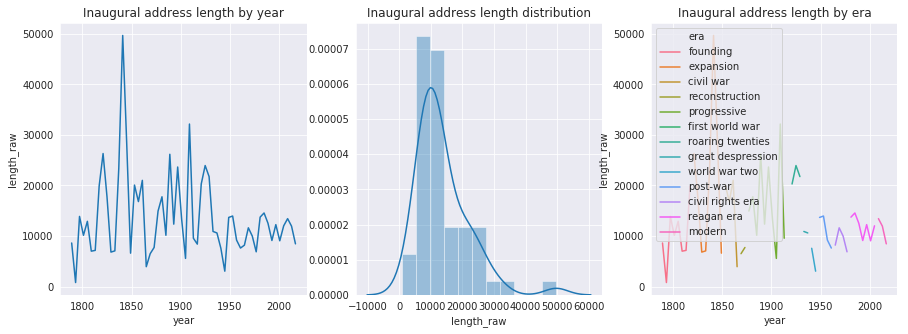

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

sns.lineplot(df_prez['year'], df_prez['length_raw'], ax=axes[0])
axes[0].set_title("Inaugural address length by year")

sns.distplot(df_prez['length_raw'], ax=axes[1])
axes[1].set_title("Inaugural address length distribution")

sns.lineplot(df_prez['year'], df_prez['length_raw'], hue=df_prez['era'], ax=axes[2])
axes[2].set_title("Inaugural address length by era")

plt.show();

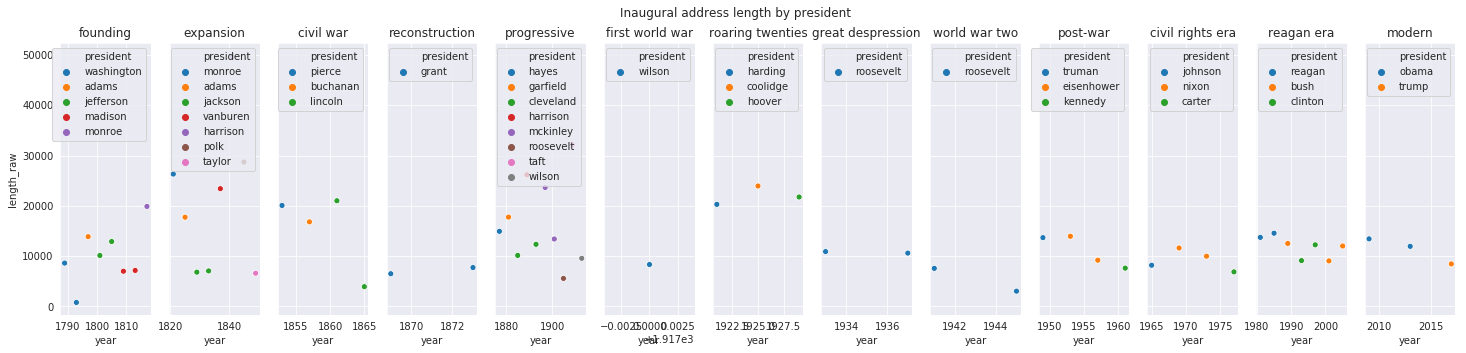

In [19]:
fig, axes = plt.subplots(1, len(df_prez['era'].unique()), figsize=(25,5), sharey=True)
idx = 0

for era in df_prez['era'].unique():
  sns.scatterplot(df_prez['year'],
                  df_prez['length_raw'].loc[df_prez['era']==era],
                  hue=df_prez['president'].loc[df_prez['era']==era],
                  ax=axes[idx])
  axes[idx].set_title(era)
  idx+=1
  
fig.suptitle("Inaugural address length by president")
plt.show();

### Clean Text

In [0]:
#
import re
def text_cleaner(text):
  doc = re.sub(r'--',' ', text)
  # remove special chars
  doc = re.sub(r'\W', ' ', doc)
  # remove all single characters
  doc = re.sub(r'\s+[a-zA-Z]\s+', ' ', doc)
  # remove single characters from the start
  doc = re.sub(r'\^[a-zA-Z]\s+', ' ', doc)
  # set to lowercase
  doc = doc.lower()
  # remove line breaks
  doc = re.sub(r"\n", " ", doc)
  doc = re.sub(r"\r", " ", doc)
  # remove annotations
  doc = re.sub(r"applause", "", doc)
  # remove numbers
  doc = re.sub(r"[0-9]", "", doc)
  # substituting multiple spaces with single space
  doc = re.sub(r'\s+', ' ', doc, flags=re.I)
  return doc

In [21]:
# clean texts
# raw
print('Raw:\n', df_prez["text_raw"].iloc[0][0:200], '\n')
# iterate over texts with text_cleaner()
df_prez["text_clean"] = [text_cleaner(x) for x in df_prez['text_raw']]
# clean
print('Clean:\n', df_prez["text_clean"].iloc[0][0:200])

Raw:
 Fellow-Citizens of the Senate and of the House of Representatives:

Among the vicissitudes incident to life no event could have filled me with greater anxieties than that of which the notification was 

Clean:
 fellow citizens of the senate and of the house of representatives among the vicissitudes incident to life no event could have filled me with greater anxieties than that of which the notification was t


In [22]:
df_prez['length_clean'] = [len(x) for x in df_prez['text_clean']]
display(df_prez['length_clean'].describe())
df_prez.head()

count       58.000000
mean     13282.241379
std       8113.101655
min        763.000000
25%       7883.750000
50%      11578.500000
75%      17123.000000
max      48630.000000
Name: length_clean, dtype: float64

,fileid,target,era,year,president,party,recession,wartime,text_raw,length_raw,text_clean,length_clean
0,1789-Washington.txt,0,founding,1789,washington,federalist,0,0,Fellow-Citizens of the Senate and of the House...,8619,fellow citizens of the senate and of the house...,8427
1,1793-Washington.txt,0,founding,1793,washington,federalist,0,0,"Fellow citizens, I am again called upon by the...",791,fellow citizens am again called upon by the vo...,763
2,1797-Adams.txt,0,founding,1797,adams,federalist,0,0,"When it was first perceived, in early times, t...",13877,when it was first perceived in early times tha...,13473
3,1801-Jefferson.txt,0,founding,1801,jefferson,democratic-republican,0,0,Friends and Fellow Citizens:\n\nCalled upon to...,10137,friends and fellow citizens called upon to und...,9835
4,1805-Jefferson.txt,0,founding,1805,jefferson,democratic-republican,0,0,"Proceeding, fellow citizens, to that qualifica...",12908,proceeding fellow citizens to that qualificati...,12598


### Parse Text

In [23]:
%%time

import spacy

# create list to hold spaCy docs
text_parsed = []
text_nostops = []
all_words = []
common_words = []

# parse cleaned text
# instantiate nlp
#nlp = spacy.load('en', disable=['parser', 'ner'])
nlp = spacy.load('en')
spacy_text = nlp.pipe(df_prez['text_clean'], batch_size=10, n_threads=3)

# use spaCy generator to append docs to doc list
for text in spacy_text:
  #text = [token.lemma_ for token in nlp(str(text))]
  text_parsed.append([token.lemma_ for token in nlp(str(text))])
  #text = [token.lemma_ for token in nlp(str(text)) if not token.is_stop]
  text_nostops.append([token.lemma_ for token in nlp(str(text)) if not token.is_stop])

# add spaCy docs to lyrics DF
df_prez['text_parsed'] = text_parsed
df_prez['length_parsed'] = [len(x) for x in df_prez['text_parsed']]
df_prez['text_nostops'] = text_nostops
df_prez['length_nostops'] = [len(x) for x in df_prez['text_nostops']]
display(df_prez.head())

,fileid,target,era,year,president,party,recession,wartime,text_raw,length_raw,text_clean,length_clean,text_parsed,length_parsed,text_nostops,length_nostops
0,1789-Washington.txt,0,founding,1789,washington,federalist,0,0,Fellow-Citizens of the Senate and of the House...,8619,fellow citizens of the senate and of the house...,8427,"[fellow, citizen, of, the, senate, and, of, th...",1394,"[fellow, citizen, senate, house, representativ...",579
1,1793-Washington.txt,0,founding,1793,washington,federalist,0,0,"Fellow citizens, I am again called upon by the...",791,fellow citizens am again called upon by the vo...,763,"[fellow, citizen, be, again, call, upon, by, t...",129,"[fellow, citizen, call, voice, country, execut...",56
2,1797-Adams.txt,0,founding,1797,adams,federalist,0,0,"When it was first perceived, in early times, t...",13877,when it was first perceived in early times tha...,13473,"[when, -PRON-, be, first, perceive, in, early,...",2257,"[perceive, early, time, middle, course, americ...",976
3,1801-Jefferson.txt,0,founding,1801,jefferson,democratic-republican,0,0,Friends and Fellow Citizens:\n\nCalled upon to...,10137,friends and fellow citizens called upon to und...,9835,"[friend, and, fellow, citizen, call, upon, to,...",1688,"[friend, fellow, citizen, call, undertake, dut...",723
4,1805-Jefferson.txt,0,founding,1805,jefferson,democratic-republican,0,0,"Proceeding, fellow citizens, to that qualifica...",12908,proceeding fellow citizens to that qualificati...,12598,"[proceed, fellow, citizen, to, that, qualifica...",2128,"[proceed, fellow, citizen, qualification, cons...",902


CPU times: user 53.1 s, sys: 1.26 s, total: 54.4 s
Wall time: 58.4 s


In [24]:
print(df_prez['text_parsed'].iloc[0][:200])
print(df_prez['text_nostops'].iloc[0][:200])

['fellow', 'citizen', 'of', 'the', 'senate', 'and', 'of', 'the', 'house', 'of', 'representative', 'among', 'the', 'vicissitude', 'incident', 'to', 'life', 'no', 'event', 'could', 'have', 'fill', '-PRON-', 'with', 'great', 'anxiety', 'than', 'that', 'of', 'which', 'the', 'notification', 'be', 'transmit', 'by', '-PRON-', 'order', 'and', 'receive', 'on', 'the', 'th', 'day', 'of', 'the', 'present', 'month', 'on', 'the', 'one', 'hand', 'be', 'summon', 'by', '-PRON-', 'country', 'whose', 'voice', 'can', 'never', 'hear', 'but', 'with', 'veneration', 'and', 'love', 'from', 'retreat', 'which', 'have', 'choose', 'with', 'the', 'fond', 'predilection', 'and', 'in', '-PRON-', 'flatter', 'hope', 'with', 'an', 'immutable', 'decision', 'as', 'the', 'asylum', 'of', '-PRON-', 'decline', 'year', 'retreat', 'which', 'be', 'render', 'every', 'day', 'more', 'necessary', 'as', 'well', 'as', 'more', 'dear', 'to', '-PRON-', 'by', 'the', 'addition', 'of', 'habit', 'to', 'inclination', 'and', 'of', 'frequent', '

57310
2000
['government', 'people', 'nation', 'state', 'great', 'country', 'world', 'power', 'shall', 'citizen', 'time', 'law', 'right', 'peace', 'good', 'new', 'man', 'american', 'public', 'america']
['fellow', 'citizen', 'senate', 'house', 'representative', 'vicissitude', 'incident', 'life', 'event', 'fill', 'great', 'anxiety', 'notification', 'transmit', 'order', 'receive', 'th', 'day', 'present', 'month']


In [26]:
top_words = []
idx=0
for list in text_nostops:
  top_words.append([x for x in Counter(text_nostops[idx]).most_common(20)])
  idx+=1
print(type(top_words))
print(len(top_words))
print(top_words[0])

<class 'list'>
58
[('government', 9), ('public', 6), ('citizen', 5), ('present', 5), ('country', 5), ('duty', 5), ('great', 4), ('hand', 4), ('ought', 4), ('people', 4), ('united', 4), ('fellow', 3), ('nature', 3), ('circumstance', 3), ('nation', 3), ('liberty', 3), ('happiness', 3), ('good', 3), ('establish', 3), ('measure', 3)]


In [27]:
top_words = []
idx=0
for list in text_nostops:
  local_words = []
  top_words_dict={}
  local_words.append([x for x in Counter(text_nostops[idx]).most_common(20)])
  for list in local_words:
    for key, value in list:
      top_words_dict[key] = value
  top_words.append(top_words_dict)
  idx+=1
print(type(top_words))
print(len(top_words))
print(type(top_words[0]))
for items in top_words[0].items():
  print(items)

<class 'list'>
58
<class 'dict'>
('government', 9)
('public', 6)
('citizen', 5)
('present', 5)
('country', 5)
('duty', 5)
('great', 4)
('hand', 4)
('ought', 4)
('people', 4)
('united', 4)
('fellow', 3)
('nature', 3)
('circumstance', 3)
('nation', 3)
('liberty', 3)
('happiness', 3)
('good', 3)
('establish', 3)
('measure', 3)


In [28]:
df_prez['top_words_dict'] = [x for x in top_words]

key_list = [x.keys() for x in top_words]
top_words_local = []
for list in key_list:
  top_words_local.append([x for x in list])

df_prez['top_words'] = [x for x in top_words_local]
print(type(df_prez['top_words'][0]))
print(df_prez['top_words'][0])
df_prez.head()

<class 'list'>
['government', 'public', 'citizen', 'present', 'country', 'duty', 'great', 'hand', 'ought', 'people', 'united', 'fellow', 'nature', 'circumstance', 'nation', 'liberty', 'happiness', 'good', 'establish', 'measure']


,fileid,target,era,year,president,party,recession,wartime,text_raw,length_raw,text_clean,length_clean,text_parsed,length_parsed,text_nostops,length_nostops,top_words_dict,top_words
0,1789-Washington.txt,0,founding,1789,washington,federalist,0,0,Fellow-Citizens of the Senate and of the House...,8619,fellow citizens of the senate and of the house...,8427,"[fellow, citizen, of, the, senate, and, of, th...",1394,"[fellow, citizen, senate, house, representativ...",579,"{'government': 9, 'public': 6, 'citizen': 5, '...","[government, public, citizen, present, country..."
1,1793-Washington.txt,0,founding,1793,washington,federalist,0,0,"Fellow citizens, I am again called upon by the...",791,fellow citizens am again called upon by the vo...,763,"[fellow, citizen, be, again, call, upon, by, t...",129,"[fellow, citizen, call, voice, country, execut...",56,"{'shall': 3, 'oath': 2, 'fellow': 1, 'citizen'...","[shall, oath, fellow, citizen, call, voice, co..."
2,1797-Adams.txt,0,founding,1797,adams,federalist,0,0,"When it was first perceived, in early times, t...",13877,when it was first perceived in early times tha...,13473,"[when, -PRON-, be, first, perceive, in, early,...",2257,"[perceive, early, time, middle, course, americ...",976,"{'people': 20, 'nation': 20, 'government': 18,...","[people, nation, government, state, country, c..."
3,1801-Jefferson.txt,0,founding,1801,jefferson,democratic-republican,0,0,Friends and Fellow Citizens:\n\nCalled upon to...,10137,friends and fellow citizens called upon to und...,9835,"[friend, and, fellow, citizen, call, upon, to,...",1688,"[friend, fellow, citizen, call, undertake, dut...",723,"{'government': 13, 'principle': 9, 'man': 9, '...","[government, principle, man, good, fellow, cit..."
4,1805-Jefferson.txt,0,founding,1805,jefferson,democratic-republican,0,0,"Proceeding, fellow citizens, to that qualifica...",12908,proceeding fellow citizens to that qualificati...,12598,"[proceed, fellow, citizen, to, that, qualifica...",2128,"[proceed, fellow, citizen, qualification, cons...",902,"{'public': 14, 'state': 12, 'citizen': 10, 'fe...","[public, state, citizen, fellow, duty, interes..."


### Save data locally

In [0]:
from google.colab import files
filename = 'inaugural'
df_prez.to_csv(filename+".csv", index=True)
#files.download(filename+".csv")

## Feature Engineering

### Bag of Words

In [95]:
all_words = []
for text in df_prez['text_nostops']:
  for word in text:
    all_words.append(word)
    
all_words.remove("-PRON-")
print(len(all_words))
print(all_words[:10])

from collections import Counter
common_words = [word[0] for word in Counter(all_words).most_common(2000)]
print(len(common_words))
print(type(common_words))
print(type(common_words[0]))
print(common_words[:10])

57309
['fellow', 'citizen', 'senate', 'house', 'representative', 'vicissitude', 'incident', 'life', 'event', 'fill']
2000
<class 'list'>
<class 'str'>
['government', 'people', 'nation', 'state', 'great', 'country', 'world', 'power', 'shall', 'citizen']


In [96]:
word_counts = pd.concat([df_prez[['fileid', 'text_nostops']],
                         pd.DataFrame(columns=common_words)], axis=1)
word_counts.loc[:, common_words] = 0

display(word_counts.columns)
word_counts.head()

Index(['fileid', 'text_nostops', 'government', 'people', 'nation', 'state',
       'great', 'country', 'world', 'power',
       ...
       'economical', 'rightfully', 'consume', 'opening', 'unmindful', 'active',
       'sorrow', 'furnace', 'justification', 'channel'],
      dtype='object', length=2002)

,fileid,text_nostops,government,people,nation,state,great,country,world,power,shall,citizen,time,law,right,peace,good,new,man,american,public,america,duty,constitution,war,free,interest,freedom,united,union,life,year,hope,national,principle,know,let,fellow,work,spirit,...,scope,relative,faction,occasionally,widen,dependence,abolish,columbia,fullness,overcome,probably,uniform,betray,monarchy,complain,potent,strange,mischief,minister,corner,absence,clothe,joint,prudent,accession,inform,temple,annual,asia,levy,economical,rightfully,consume,opening,unmindful,active,sorrow,furnace,justification,channel
0,1789-Washington.txt,"[fellow, citizen, senate, house, representativ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1793-Washington.txt,"[fellow, citizen, call, voice, country, execut...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1797-Adams.txt,"[perceive, early, time, middle, course, americ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1801-Jefferson.txt,"[friend, fellow, citizen, call, undertake, dut...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1805-Jefferson.txt,"[proceed, fellow, citizen, qualification, cons...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [97]:
%%time
# Create our data frame with features. This can take a while to run.

# Process each row, counting the occurrence of words in each sentence.
for i, text in enumerate(word_counts['text_nostops']):

  words = [word for word in text if word in common_words]

  # Populate the row with word counts.
  for word in words:
    word_counts.loc[i, word] += 1

  # This counter is just to make sure the kernel didn't hang.
  if i % 50 == 0:
    print("Processing row {}".format(i))

Processing row 0
Processing row 50
CPU times: user 1min 9s, sys: 695 ms, total: 1min 9s
Wall time: 1min 9s


In [98]:
word_counts.head()

,fileid,text_nostops,government,people,nation,state,great,country,world,power,shall,citizen,time,law,right,peace,good,new,man,american,public,america,duty,constitution,war,free,interest,freedom,united,union,life,year,hope,national,principle,know,let,fellow,work,spirit,...,scope,relative,faction,occasionally,widen,dependence,abolish,columbia,fullness,overcome,probably,uniform,betray,monarchy,complain,potent,strange,mischief,minister,corner,absence,clothe,joint,prudent,accession,inform,temple,annual,asia,levy,economical,rightfully,consume,opening,unmindful,active,sorrow,furnace,justification,channel
0,1789-Washington.txt,"[fellow, citizen, senate, house, representativ...",9,4,3,2,4,5,1,2,3,5,1,0,2,0,3,1,1,2,6,0,5,1,0,2,1,0,4,2,1,1,2,1,1,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1793-Washington.txt,"[fellow, citizen, call, voice, country, execut...",1,1,0,0,0,1,0,0,3,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1797-Adams.txt,"[perceive, early, time, middle, course, americ...",18,20,20,12,5,10,3,6,4,6,3,2,2,5,7,1,4,3,6,5,3,9,1,2,4,0,3,2,2,5,1,4,3,0,0,3,0,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1801-Jefferson.txt,"[friend, fellow, citizen, call, undertake, dut...",13,2,4,3,4,4,3,5,6,7,0,4,6,5,8,0,9,0,4,0,2,2,1,3,0,4,0,2,1,0,2,0,9,1,7,7,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1805-Jefferson.txt,"[proceed, fellow, citizen, qualification, cons...",3,0,6,12,1,5,2,4,7,10,6,6,4,4,4,1,3,1,14,0,8,6,4,1,8,2,1,3,2,4,0,0,4,2,2,8,1,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


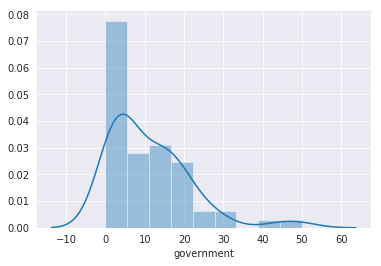

In [99]:
word_counts['government'].astype(int).describe()
sns.distplot(word_counts['government'].astype(int))
plt.show();

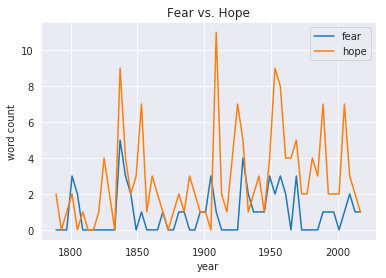

In [100]:
sns.lineplot(x=df_prez['year'], y=word_counts['fear'].astype(int), label='fear')
sns.lineplot(x=df_prez['year'], y=word_counts['hope'].astype(int), label='hope')
plt.ylabel('word count')
plt.legend()
plt.title('Fear vs. Hope')
plt.show();

#### Save data locally

In [0]:
from google.colab import files
filename = 'inaugural'
word_counts.to_csv(filename+"_word_counts.csv", index=True)
#files.download(filename+"_word_counts.csv")

### TF-IDF

In [121]:
# Create vectorizer model in order to get tf-idf for each sentence
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(
    max_df=0.5, # drop words that occur in more than half the paragraphs
    min_df=2, # only use words that appear at least twice
    stop_words='english', 
    lowercase=False,
    use_idf=True,# use inverse document frequencies in our weighting
    norm=u'l2', # Applies correction factor so long paragraphs and short paragraphs are equally weighted
    smooth_idf=True # Prevents divide-by-zero errors
    )

# Convert (text_sentence) from spacy object to string
text_list = word_counts['text_nostops'].astype(str)
text_list = [text.replace('PRON', "") for text in text_list]
print(type(text_list))

# Pass pandas series to our vectorizer model
text_tfidf = vectorizer.fit_transform(text_list)
print(type(text_tfidf))

<class 'list'>
<class 'scipy.sparse.csr.csr_matrix'>


In [122]:
# get list of features
terms = vectorizer.get_feature_names()
# shape
n = text_tfidf.shape[0]
# create list of dictionaries per paragraph
tfidf_bytext = [{} for _ in range(0,n)]
# for each sentence, lists the feature words and their tf-idf scores
for i, j in zip(*text_tfidf.nonzero()):
    tfidf_bytext[i][terms[j]] = text_tfidf[i, j]

# view dictionary
print(type(tfidf_bytext))
display(tfidf_bytext[0])

<class 'list'>


{'accomplish': array(0.03383471),
 'accordingly': array(0.06621976),
 'acknowledge': array(0.03943449),
 'actual': array(0.04793597),
 'actuate': array(0.06143198),
 'add': array(0.0316124),
 'addition': array(0.05468397),
 'address': array(0.04181606),
 'adopt': array(0.03550036),
 'adore': array(0.06621976),
 'adorn': array(0.06621976),
 'advance': array(0.02846291),
 'advancement': array(0.04459628),
 'advantage': array(0.03306049),
 'advantageously': array(0.06621976),
 'affair': array(0.02965218),
 'affect': array(0.03735145),
 'affection': array(0.04314819),
 'affectionate': array(0.06143198),
 'agency': array(0.04459628),
 'allot': array(0.06143198),
 'almighty': array(0.03028027),
 'alteration': array(0.06621976),
 'animosity': array(0.0521185),
 'anticipation': array(0.05771828),
 'anxiety': array(0.03943449),
 'appreciation': array(0.06143198),
 'ardent': array(0.04618249),
 'arduous': array(0.04618249),
 'arise': array(0.03640018),
 'article': array(0.08919257),
 'assemblage

In [123]:
# create dataframe for this feature set
tf_idf = pd.concat([df_prez[['fileid', 'text_nostops']],
                    pd.DataFrame(columns=terms)], axis=1)
tf_idf.loc[:, terms] = 0

tf_idf.head()

,fileid,text_nostops,abandon,abandonment,abide,ability,able,abode,abolish,aboriginal,abound,abraham,abreast,abroad,absence,absent,absolute,absolutely,absorb,abstain,abundance,abundant,abundantly,abuse,accept,acceptance,access,accessible,accession,accident,accommodation,accompany,accomplish,accomplishment,accord,accordance,accordingly,account,accountability,accountable,...,wind,window,winter,wipe,wise,wisely,wish,withdraw,wither,withhold,witness,woman,womanhood,wonder,wonderful,word,worker,workingman,worldly,worldwide,worship,worth,worthily,worthy,wound,wrest,writ,write,writer,wrong,yearn,yes,yesterday,yield,yorktown,young,youth,zeal,zealous,zealously
0,1789-Washington.txt,"[fellow, citizen, senate, house, representativ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1793-Washington.txt,"[fellow, citizen, call, voice, country, execut...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1797-Adams.txt,"[perceive, early, time, middle, course, americ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1801-Jefferson.txt,"[friend, fellow, citizen, call, undertake, dut...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1805-Jefferson.txt,"[proceed, fellow, citizen, qualification, cons...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [124]:
%%time
counter = 0
for i in tfidf_bytext:
    for k, v in i.items():
        tf_idf.loc[counter, k] = v
    counter += 1
    
display(tf_idf.head())

,fileid,text_nostops,abandon,abandonment,abide,ability,able,abode,abolish,aboriginal,abound,abraham,abreast,abroad,absence,absent,absolute,absolutely,absorb,abstain,abundance,abundant,abundantly,abuse,accept,acceptance,access,accessible,accession,accident,accommodation,accompany,accomplish,accomplishment,accord,accordance,accordingly,account,accountability,accountable,...,wind,window,winter,wipe,wise,wisely,wish,withdraw,wither,withhold,witness,woman,womanhood,wonder,wonderful,word,worker,workingman,worldly,worldwide,worship,worth,worthily,worthy,wound,wrest,writ,write,writer,wrong,yearn,yes,yesterday,yield,yorktown,young,youth,zeal,zealous,zealously
0,1789-Washington.txt,"[fellow, citizen, senate, house, representativ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.033834708916156774,0,0,0,0.0662197642502629,0,0,0,...,0,0,0,0,0.061866021315661796,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1793-Washington.txt,"[fellow, citizen, call, voice, country, execut...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0.16315911751713275,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1797-Adams.txt,"[perceive, early, time, middle, course, americ...",0.030995997179053426,0,0,0,0,0,0,0.0405342862937145,0,0,0,0.02631450588833742,0,0,0,0,0,0,0,0,0,0.029230664703851064,0,0,0,0,0,0.049085145930922364,0,0,0,0,0.029230664703851064,0,0,0,0,0,...,0,0,0,0,0.022928975350684343,0,0.0673354126255367,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.03553235405701779,0,0
3,1801-Jefferson.txt,"[friend, fellow, citizen, call, undertake, dut...",0.04010253062651196,0,0,0,0,0,0,0,0,0,0,0.03404563086686948,0,0,0.04597165590680112,0,0,0,0,0,0,0.07563709725149016,0,0,0,0,0,0,0,0,0,0,0.03781854862574508,0,0,0,0,0,...,0,0,0,0,0.02966544134468905,0,0.029039453400660786,0,0,0,0,0,0,0,0.05244314122650629,0,0,0,0,0,0,0,0,0,0,0,0,0.035820863927364256,0,0.0593308826893781,0,0,0,0,0,0,0,0.04597165590680112,0,0
4,1805-Jefferson.txt,"[proceed, fellow, citizen, qualification, cons...",0,0,0,0,0.030151654609926744,0,0,0.04181142688920614,0,0,0,0,0,0,0,0,0,0,0,0,0,0.06030330921985349,0,0,0,0,0,0,0,0,0,0,0.030151654609926744,0,0,0,0,0,...,0,0,0,0,0,0,0.02315233135101668,0,0,0,0.08799121155052367,0,0,0,0,0.023651413758041404,0,0,0,0,0,0,0,0,0,0,0,0.028558957342742084,0,0,0,0,0,0,0,0,0,0.10995568638543628,0,0


CPU times: user 51.8 s, sys: 1.55 s, total: 53.4 s
Wall time: 53.4 s


In [0]:
from google.colab import files
filename = 'inaugural'
tf_idf.to_csv(filename+"_tf_idf.csv", index=True)
files.download(filename+"_tf_idf.csv")